# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:

# Defining the pathway to the switch scanner metrics.
path_switchscan_metrics = '../SourceData/switch_scanner_metrics_retrain.xlsx'

# Importing the excel sheets for 4 vote and 7 vote thresholds.
df_2thr_1000ms = pd.read_excel(path_switchscan_metrics, '2_votes')
df_3thr_1000ms = pd.read_excel(path_switchscan_metrics, '3_votes')
df_4thr_1000ms = pd.read_excel(path_switchscan_metrics, '4_votes')
df_5thr_1000ms = pd.read_excel(path_switchscan_metrics, '5_votes')
df_6thr_1000ms = pd.read_excel(path_switchscan_metrics, '6_votes')
df_7thr_1000ms = pd.read_excel(path_switchscan_metrics, '7_votes')

# Extracting only the summary rows for each day.
df_2thr_summary = df_2thr_1000ms.loc[df_2thr_1000ms['Date'].str.contains('Total'),:]
df_3thr_summary = df_3thr_1000ms.loc[df_3thr_1000ms['Date'].str.contains('Total'),:]
df_4thr_summary = df_4thr_1000ms.loc[df_4thr_1000ms['Date'].str.contains('Total'),:]
df_5thr_summary = df_5thr_1000ms.loc[df_5thr_1000ms['Date'].str.contains('Total'),:]
df_6thr_summary = df_6thr_1000ms.loc[df_6thr_1000ms['Date'].str.contains('Total'),:]
df_7thr_summary = df_7thr_1000ms.loc[df_7thr_1000ms['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
df_5thr_summary['Date'] = df_5thr_summary['Date'].str.replace('_Total', '')
df_6thr_summary['Date'] = df_6thr_summary['Date'].str.replace('_Total', '')
df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


/tmp/ipykernel_1012880/3597559115.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_1012880/3597559115.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_1012880/3597559115.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Total testing time (min):  428.4339


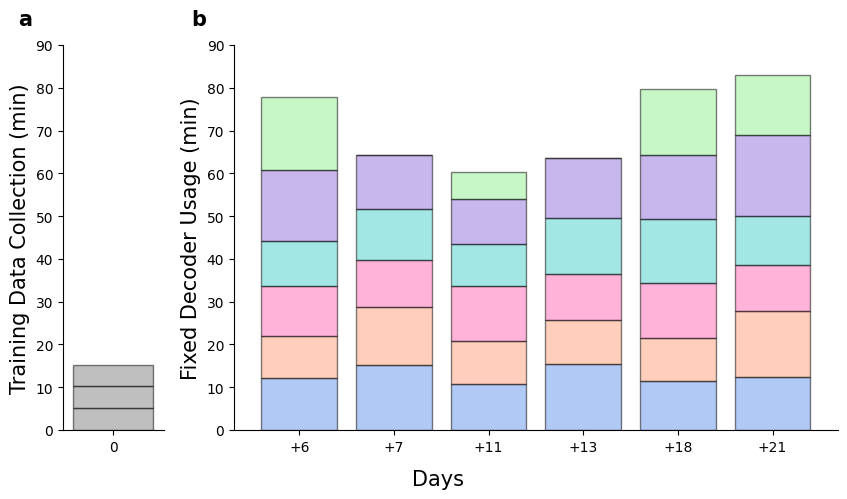

In [3]:
color_trianing = 'grey'
color_2thr     = 'lightgreen'
color_3thr     = 'mediumpurple'
color_4thr     = 'mediumturquoise'
color_5thr     = 'hotpink'
color_6thr     = 'lightsalmon'
color_7thr     = 'cornflowerblue'
unique_days    = np.array([6,7,11,13,18,21])
voting_thrs    = [7,6,5,4,3,2]

save_fig       = False


training_blocktimes = [305.8495, 305.8495, 305.8495]
training_blocks     = np.array([1, 2, 3])
training_days       = np.array([0,0,0])

unique_training_days = np.unique(training_days)

fig1, ax = plt.subplots(1,2, figsize = (10,5), width_ratios=[3,18])


for n, day in enumerate(unique_training_days):
    
    axis = 0
    
    this_old_value = 0
    
    this_day_training_inds = np.argwhere(training_days == day)
    
    for m in this_day_training_inds:
        
        this_new_value = training_blocktimes[m[0]]/60
        
        ax[axis].bar(n, this_new_value, bottom = this_old_value, color = color_trianing, edgecolor='black', zorder = 2, alpha = 0.5)
        
        this_old_value += this_new_value
    
    
time_testing = 0

for n, day in enumerate(unique_days):

    this_old_value = 0
    
    axis = 1
 
    for this_vote_thr in voting_thrs:
        
        if this_vote_thr == 7:
            if (df_7thr_summary['Days Post-Training'] == day).any():
                day_index      = df_7thr_summary['Days Post-Training'].index[df_7thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_7thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_7thr
                time_testing += this_new_value
            else:
                this_new_value = 0
        elif this_vote_thr == 6:
            if (df_6thr_summary['Days Post-Training'] == day).any():
                day_index      = df_6thr_summary['Days Post-Training'].index[df_6thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_6thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_6thr
                time_testing += this_new_value
            else:
                this_new_value = 0
        elif this_vote_thr == 5:
            if (df_5thr_summary['Days Post-Training'] == day).any():
                day_index      = df_5thr_summary['Days Post-Training'].index[df_5thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_5thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_5thr
                time_testing += this_new_value
            else:
                this_new_value = 0
        elif this_vote_thr == 4:
            if (df_4thr_summary['Days Post-Training'] == day).any():
                day_index      = df_4thr_summary['Days Post-Training'].index[df_4thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_4thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_4thr
                time_testing += this_new_value
            else:
                this_new_value = 0
        elif this_vote_thr == 3:
            if (df_3thr_summary['Days Post-Training'] == day).any():
                day_index      = df_3thr_summary['Days Post-Training'].index[df_3thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_3thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_3thr
                time_testing += this_new_value
            else:
                this_new_value = 0
        elif this_vote_thr == 2:
            if (df_2thr_summary['Days Post-Training'] == day).any():
                day_index      = df_2thr_summary['Days Post-Training'].index[df_2thr_summary['Days Post-Training'] == day][0]
                this_new_value = df_2thr_summary['Block Time (s)'].loc[day_index]/60
                my_color = color_2thr
                time_testing += this_new_value
            else:
                this_new_value = 0

        ax[axis].bar(n, this_new_value, bottom = this_old_value, color = my_color, edgecolor='black', zorder = 2, alpha = 0.5)
        
        this_old_value += this_new_value
        

        
ax[0].set_yticks(np.arange(0,100,10))  
ax[0].set_ylabel('Training Data Collection (min)', fontsize=15)
ax[0].spines[['right','top']].set_visible(False)
ax[0].set_xticks(np.arange(unique_training_days.shape[0]));
ax[0].set_xlim([-0.5,0.5])

        
ax[1].set_yticks(np.arange(0,100,10))      
ax[1].set_ylabel('Fixed Decoder Usage (min)', fontsize=15)
ax[1].spines[['right','top']].set_visible(False)

ax[1].set_xticks(np.arange(unique_days.shape[0]));

unique_days_str = unique_days.astype(str)
for n, day_str in enumerate(unique_days_str):
    unique_days_str[n] = '+' + day_str 
    
unique_training_days_str = unique_training_days.astype(str)
for n, day_str in enumerate(unique_training_days_str):
    if unique_training_days[n] != 0:
        unique_training_days_str[n] = '-' + day_str 
    
ax[0].set_xticklabels(unique_training_days_str);
ax[1].set_xticklabels(unique_days_str);

fig1.text(0.5, 0, 'Days', ha='center', fontsize=15)

fig1.text(0.08, 0.92, 
         'a', 
         style = 'normal',
         fontsize = 15,
         color = "black",
         weight='bold')
fig1.text(0.253, 0.92, 
         'b', 
         style = 'normal',
         fontsize = 15,
         color = "black",
         weight='bold')

if save_fig:
    fig1.savefig('LongTermUseRetrained.jpg', bbox_inches = 'tight', dpi=1000)
    fig1.savefig('LongTermUseRetrained.svg', format='svg', bbox_inches = 'tight', dpi=1000)

print('Total testing time (min): ', time_testing)
